creating an CSV script and downloading our data using the url 


In [104]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [105]:
import pandas as pd 
import numpy as np
nba=pd.read_csv('nba_all_elo.csv')
type(nba)

pandas.core.frame.DataFrame

In [106]:
len(nba)

126314

In [107]:
nba.shape

(126314, 23)

In [108]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [109]:
#configure Pandas to display all 23 columns like this:
pd.set_option('display.max.columns', None)
#decide how many precition display
pd.set_option('display.precision', 2)
nba.head()
nba.tail(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


In [110]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [111]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [112]:
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,196810180PHI,NBA,1/2/2009,BOS,Lakers,BOS,Lakers,H,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


EXPLORING DATA SET


In [113]:
nba['team_id'].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
TRH      60
PIT      60
INJ      60
DTF      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [114]:
nba['fran_id'].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

In [115]:
nba.loc[nba['fran_id'] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [116]:
nba.loc[nba['team_id'] == 'MNL' , 'date_game'].max()

'4/9/1959'

In [117]:
nba.loc[nba["team_id"] == 'MNL', 'date_game'].agg((min, max))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

In [118]:
nba.loc[nba['team_id'] == 'BOS', 'pts'].sum()

626484

In [119]:
revenues = pd.Series([5555, 7000, 1980])
revenues

0    5555
1    7000
2    1980
dtype: int64

In [120]:
revenues.values

array([5555, 7000, 1980], dtype=int64)

In [121]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [122]:
city_revenues= pd.Series([4200, 8000, 6500], index=['Amsterdam', 'Toronto', 'Tokyo'])
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [123]:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

In [124]:
nba.iloc[-2]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/16/2015
seasongame                102
is_playoffs                 1
team_id                   CLE
fran_id             Cavaliers
pts                        97
elo_i                 1.7e+03
elo_n                 1.7e+03
win_equiv                  59
opp_id                    GSW
opp_fran             Warriors
opp_pts                   105
opp_elo_i             1.8e+03
opp_elo_n             1.8e+03
game_location               H
game_result                 L
forecast                 0.48
notes                     NaN
Name: 126312, dtype: object

In [125]:
nba.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


In [126]:
current_decade=nba[nba["year_id"]> 2010]
current_decade.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.36,1543.16,45.14,BOS,Celtics,88,1625.10,1629.30,A,L,0.26,NaN
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.10,1629.30,53.75,MIA,Heat,80,1547.36,1543.16,H,W,0.74,NaN
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.20,1502.60,40.90,LAL,Lakers,112,1647.60,1649.20,A,L,0.20,NaN
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.60,1649.20,55.61,HOU,Rockets,110,1504.20,1502.60,H,W,0.80,NaN
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.02,1630.62,53.88,POR,Trailblazers,106,1552.81,1565.22,A,L,0.49,NaN


In [127]:
nba_notes= nba[nba["notes"].notnull()]
nba_notes.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
122207,61104,201401160ATL,NBA,0,2014,1/16/2014,39,0,ATL,Hawks,110,1505.05,1487.59,39.24,BRK,Nets,127,1454.65,1472.11,N,L,0.57,"at London, England"
123916,61959,201411120MIN,NBA,1,2015,11/12/2014,8,0,HOU,Rockets,113,1635.77,1642.45,54.89,MIN,Timberwolves,101,1502.92,1496.24,N,W,0.68,"at Mexico City Arena, Mexico City, Mexico"
123917,61959,201411120MIN,NBA,0,2015,11/12/2014,7,0,MIN,Timberwolves,101,1502.92,1496.24,40.13,HOU,Rockets,113,1635.77,1642.45,N,L,0.32,"at Mexico City Arena, Mexico City, Mexico"
124862,62432,201501150MIL,NBA,0,2015,1/15/2015,40,0,MIL,Bucks,95,1499.90,1505.86,41.14,NYK,Knicks,79,1304.46,1298.50,N,W,0.75,"at The O2, London, England"
124863,62432,201501150MIL,NBA,1,2015,1/15/2015,41,0,NYK,Knicks,79,1304.46,1298.50,21.19,MIL,Bucks,95,1499.90,1505.86,N,L,0.25,"at The O2, London, England"


In [128]:
nba_ers=nba[nba["fran_id"].str.endswith("ers")]
nba_ers

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,59,1300.00,1305.15,41.54,BOS,Celtics,53,1300.00,1294.85,H,W,0.64,NaN
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,56,1300.00,1304.69,41.49,PIT,Ironmen,51,1300.00,1295.31,H,W,0.64,NaN
16,9,194611050DTF,NBA,1,1947,11/5/1946,2,0,STB,Bombers,53,1304.69,1312.85,42.35,DTF,Falcons,49,1279.62,1271.46,A,W,0.39,NaN
20,11,194611070PRO,NBA,0,1947,11/7/1946,2,0,PRO,Steamrollers,73,1305.15,1311.50,42.21,CHS,Stags,65,1316.08,1309.73,H,W,0.63,NaN
22,12,194611070STB,NBA,0,1947,11/7/1946,3,0,STB,Bombers,63,1312.85,1302.60,41.27,NYK,Knicks,68,1297.07,1307.32,H,L,0.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126304,63153,201506070GSW,NBA,1,2015,6/7/2015,98,1,CLE,Cavaliers,95,1708.17,1716.87,61.31,GSW,Warriors,93,1806.20,1797.50,A,W,0.24,NaN
126307,63154,201506090CLE,NBA,0,2015,6/9/2015,99,1,CLE,Cavaliers,96,1716.87,1723.41,61.83,GSW,Warriors,91,1797.50,1790.96,H,W,0.53,NaN
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN


In [129]:
nba[
...     (nba["_iscopy"] == 0) &
...     (nba["pts"] > 100) &
...     (nba["opp_pts"] > 100) &
...     (nba["team_id"] == "BLB")
... ]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


In [130]:
nba[
...     (nba["_iscopy"] == 0) &
...     (nba["team_id"].str.startswith("LA")) &
...     (nba["year_id"]==1992) &
...     (nba["notes"].notnull())
... ]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


In [131]:
points=nba["pts"]
points.sum()

12976235

In [132]:
nba.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [133]:
nba.groupby("fran_id", sort=True)["pts"].sum()

fran_id
Baltimore        37219
Bombers          17793
Bucks           418326
Bulls           437269
Capitols         22387
Cavaliers       380416
Celtics         626484
Clippers        380523
Colonels         94435
Condors          49642
Denver            4818
Falcons           3797
Floridians       49568
Grizzlies       157683
Hawks           567261
Heat            229103
Hornets          84489
Huskies           3995
Ironmen           3674
Jazz            363155
Jets              4482
Kings           569245
Knicks          582497
Lakers          637444
Magic           219436
Mavericks       309239
Nets            417809
Nuggets         445780
Olympians        22864
Pacers          438288
Packers           6193
Pelicans        220794
Pistons         572758
Raptors         158370
Rebels            4474
Redskins          5372
Rockets         432504
Sails            30080
Sixers          585891
Sounds           75582
Spirits          85874
Spurs           453822
Squires          91127
Sta

In [134]:
nba[
...     (nba["fran_id"] == "Spurs") &
...     (nba["year_id"] > 2010)
... ].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [135]:
nba[
...     (nba["fran_id"] == "Warriors") &
...     (nba["year_id"] == 2015)
... ].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2015     L              20
         W              83
Name: game_id, dtype: int64

In [136]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [137]:
dropna_nba=nba.dropna()

In [138]:
dropna_nba.shape

(5424, 23)

In [139]:
%matplotlib inline

In [142]:
nba[nba["fran_id"] == "knicks"].groupby("year_id")["pts"].sum()

Series([], Name: pts, dtype: int64)

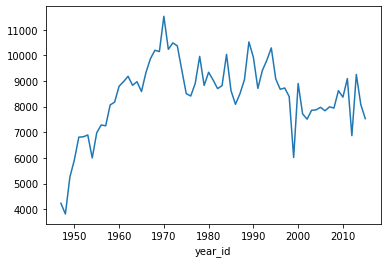

In [141]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

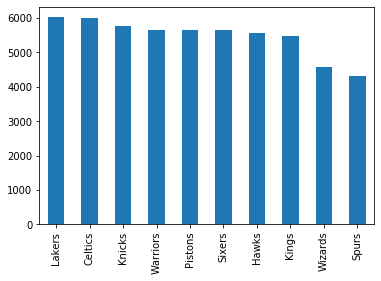

In [143]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

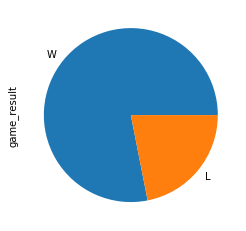

In [148]:
nba[
    (nba["fran_id"]== "Heat") &
    (nba["year_id"] == 2013)
]["game_result"].value_counts().plot(kind="pie")